# Module 6: CLUSTERING ASSIGNMENT
                                                                                                        ASHA NAIR
                                                                                                        PGDDS C16
                                                                                                        D.O.S: 25 May 2020

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid.

#### Objective:

1. To cluster the countries by socio-economic and health factors that determine the overall development of the country
2. To make suggestions and recommendations to the CEO of HELP International.

The steps of the analysis are as follows:

1. Read and understand the data.
2. Exploratory Data Analysis
3. Prepare the data for modelling
4. Clustering
5. Suggestions and Recommendations

## 1. Data Inspection

In [148]:
#Import the important Python Librairies to get started.
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [149]:
#Read the csv file using Pandas library.
country=pd.read_csv("Country-data.csv")
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


The features exports,health and imports are given as percentage of gdpp. These have to be converted to absolute values.

In [150]:
country['exports']=round((country['exports']*country['gdpp'])/100,2)
country['health']=round((country['health']*country['health'])/100,2)
country['imports']=round((country['imports']*country['gdpp'])/100,2)

country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,0.57,248.30,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,0.43,1987.74,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,0.17,1400.44,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,0.08,1514.37,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,0.36,7185.80,19100,1.44,76.8,2.13,12200


In [151]:
#Check the dimensions of the dataset
country.shape

(167, 10)

In [152]:
#Check the datatypes of the columns in the dataset
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [153]:
# Inspect the statistical measures of the numerical columns.
country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618862,0.539641,6588.352096,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885789,0.441208,14710.810423,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.080000,0.030000,0.650000,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,0.240000,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,0.400000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,0.740000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,3.200000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


## 2. Exploratory Data Analysis

In [154]:
#Inspect the dataset, country, for missing values. The code below will display the percentage of missing values.
round(100*(country.isnull().sum()/len(country)),2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

In [304]:
# Check for duplicates in the data
country.loc[country.duplicated()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


The result suggests that there are no missing values and duplicates in the dataset.

The describe method suggests there are outliers in some of the key parameters like exports, imports, income,gdpp that would need help to identify the top five countries in need of aid. However, treating them at this stage may affect clustering.

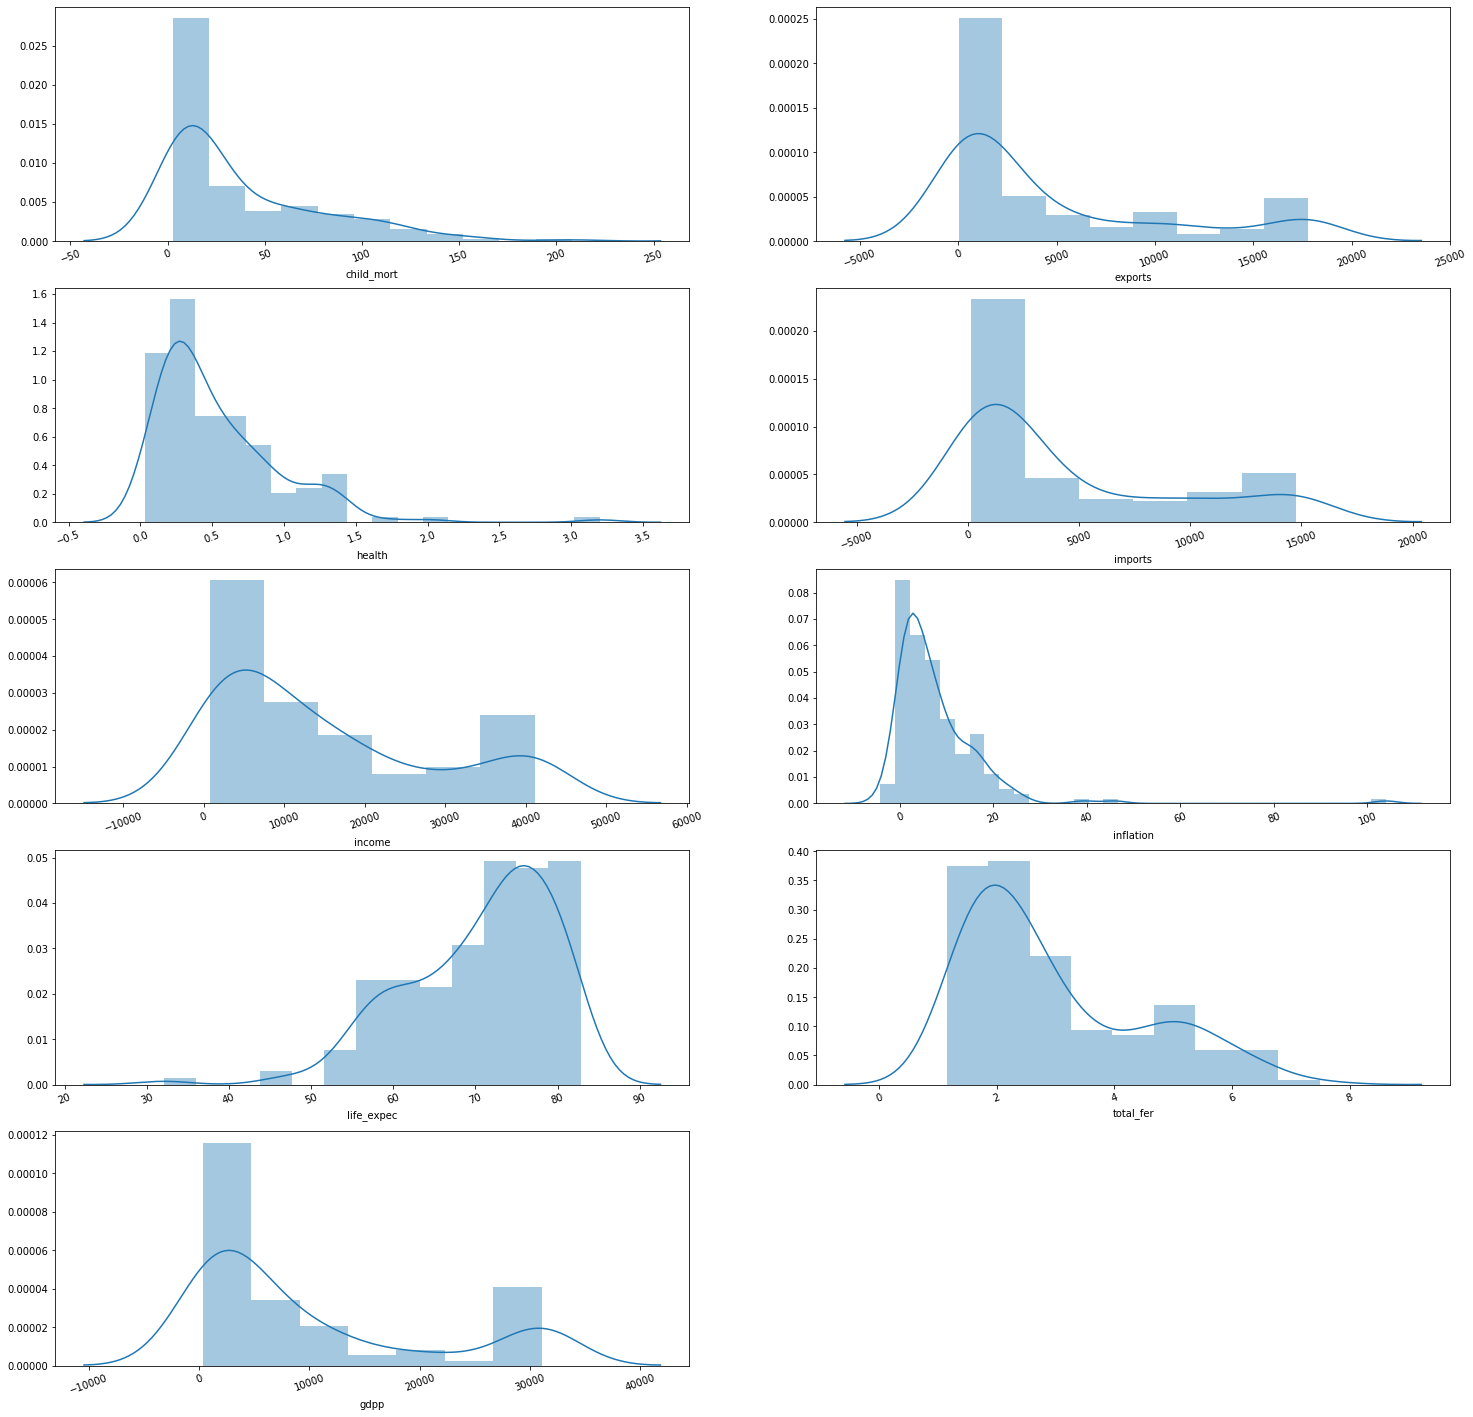

In [258]:
# Plot to check the distributions of the features.
plt.figure(figsize=(25,25))
features = ['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']
for i in enumerate(features): 
    ax = plt.subplot(5, 2, i[0]+1)
    sns.distplot(country[i[1]])
    plt.xticks(rotation = 20)

From the graphs above, we find that the child mortality,exports and inflation have almost a normal distribution.

In [156]:
country.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

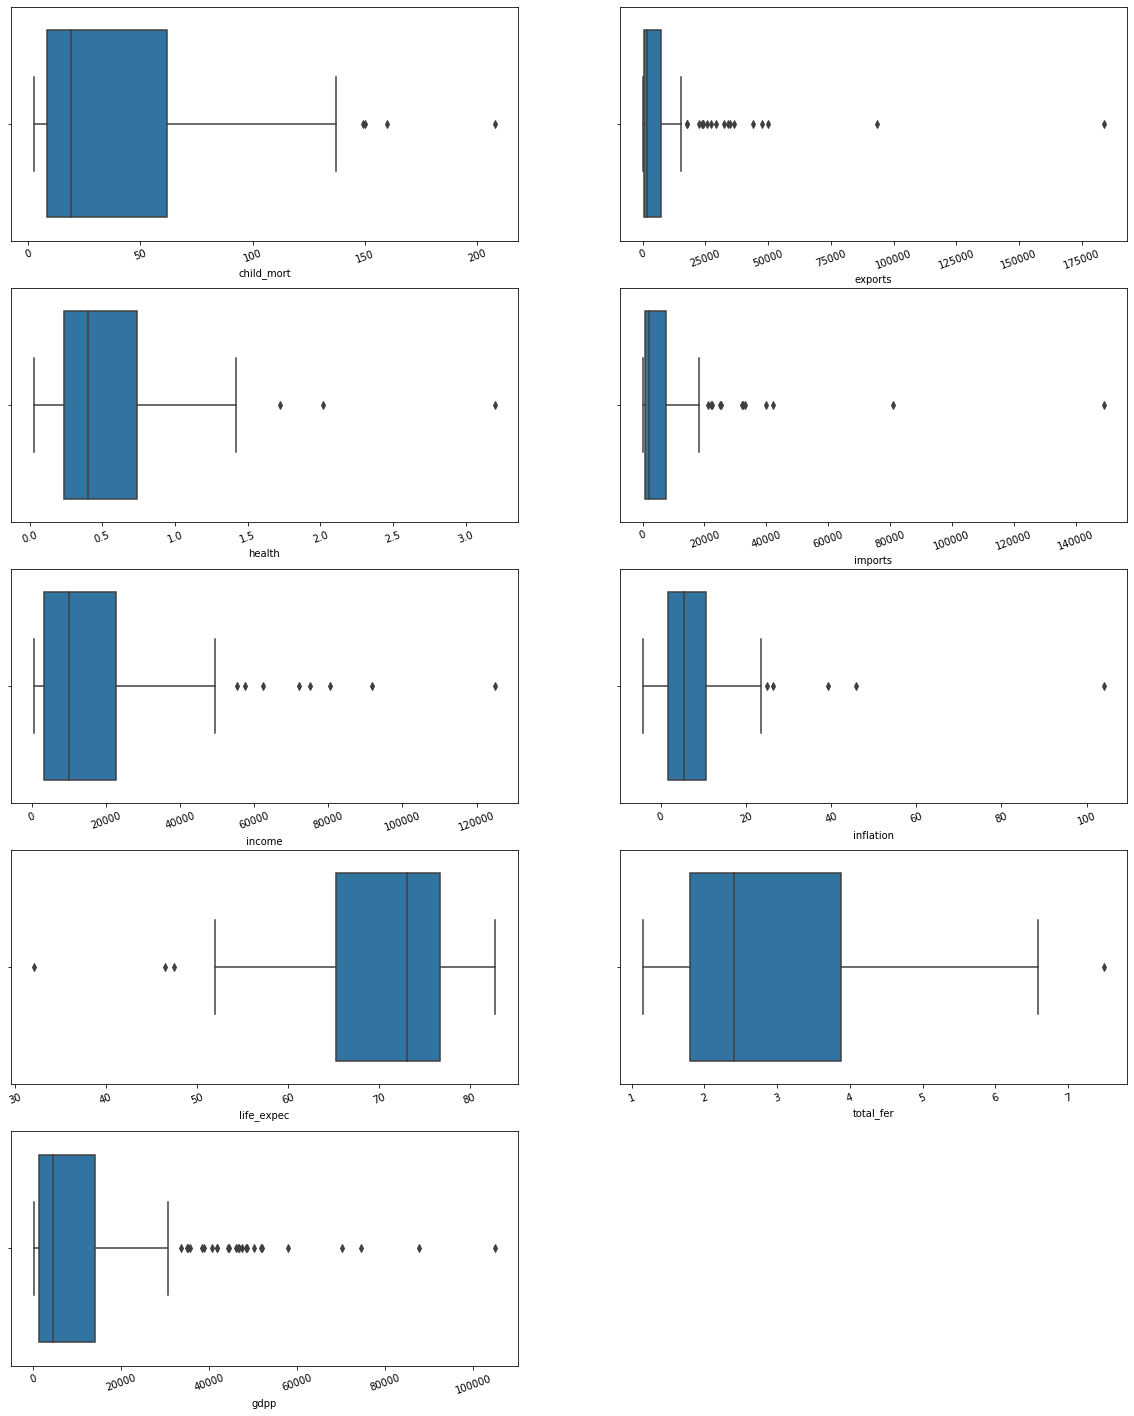

In [157]:
plt.figure(figsize=(20,25))
features =  ['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']
for i in enumerate(features): 
    ax = plt.subplot(5, 2, i[0]+1)
    sns.boxplot(x=i[1], data=country)
    plt.xticks(rotation = 20)

The box plots above show that there are high number of outliers in exports,imports, income and gdpp. These values are beyond the 75th quartile which means these nations are in a postion to support themselves. It is fine to cap them as the analysis is to find countries in need.

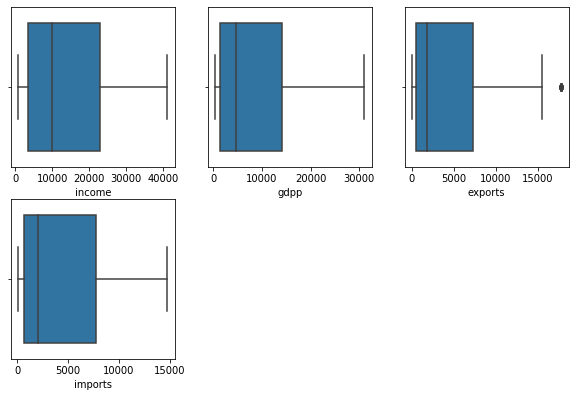

In [214]:
# Treating the outliers in income and gdpp. Our focus is to find the countries in need.
# Capping outliers in high income and high gdp countries
plt.figure(figsize=(10,10))
plt.subplot(331)
Q1 = country['income'].quantile(0.01)
Q4 = country['income'].quantile(0.95)
country['income'][country['income'] <= Q1]=Q1
country['income'][country['income'] >= Q4]=Q4
sns.boxplot(x='income',data=country)

plt.subplot(332)
Q1 = country['gdpp'].quantile(0.01)
Q4 = country['gdpp'].quantile(0.85)
country['gdpp'][country['gdpp'] <= Q1]=Q1
country['gdpp'][country['gdpp'] >= Q4]=Q4
sns.boxplot(x='gdpp',data=country)

plt.subplot(333)
Q1 = country['exports'].quantile(0.01)
Q4 = country['exports'].quantile(0.95)
country['exports'][country['exports'] <= Q1]=Q1
country['exports'][country['exports'] >= Q4]=Q4
sns.boxplot(x='exports',data=country)

plt.subplot(334)
Q1 = country['imports'].quantile(0.01)
Q4 = country['imports'].quantile(0.95)
country['imports'][country['imports'] <= Q1]=Q1
country['imports'][country['imports'] >= Q4]=Q4
sns.boxplot(x='imports',data=country)



### 3.Data Preparation

In [215]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [216]:

country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,0.57,248.30,1610.0,9.44,56.2,5.82,553.0
1,Albania,16.6,1145.20,0.43,1987.74,9930.0,4.49,76.3,1.65,4090.0
2,Algeria,27.3,1712.64,0.17,1400.44,12900.0,16.10,76.5,2.89,4460.0
3,Angola,119.0,2199.19,0.08,1514.37,5900.0,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,5551.00,0.36,7185.80,19100.0,1.44,76.8,2.13,12200.0


In [217]:
# Check the hopkins measure
hopkins(country[["child_mort","exports","health","imports","income","inflation","life_expec","total_fer","gdpp"]])

0.9203618065150171

#### A Hopkins score above 0.9 shows that the data has a great tendency to form clusters.

### Scaling the data

In [259]:
# Scaling the data. Import the Python library sklearn
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
df1 = standard_scaler.fit_transform(country[["child_mort","exports","health","imports","income","inflation","life_expec","total_fer","gdpp"]])

In [219]:
df2=pd.DataFrame(df1)
df2.head()
df2.columns = ["child_mort","exports","health","imports","income","inflation","life_expec","total_fer","gdpp"]
df2.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.797327,0.069016,-0.846454,-0.995359,0.157336,-1.619092,1.902882,-0.864350
1,-0.538949,-0.611673,-0.249248,-0.494283,-0.386223,-0.312347,0.647866,-0.859973,-0.542320
2,-0.272833,-0.515016,-0.840311,-0.613189,-0.168779,0.789274,0.670423,-0.038404,-0.508633
3,2.007808,-0.432137,-1.044910,-0.590123,-0.681273,1.387054,-1.179234,2.128151,-0.593306
4,-0.695634,0.138810,-0.408381,0.558126,0.285144,-0.601749,0.704258,-0.541946,0.196063


## 4. Clustering

### K- Means Clustering

In [220]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [262]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df2)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df2, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))


For n_clusters=2, the silhouette score is 0.43936741864062273
For n_clusters=3, the silhouette score is 0.40454367097634275
For n_clusters=4, the silhouette score is 0.40745087297469124
For n_clusters=5, the silhouette score is 0.3033869563031255
For n_clusters=6, the silhouette score is 0.2390445581678012
For n_clusters=7, the silhouette score is 0.26060412348367973
For n_clusters=8, the silhouette score is 0.26086702508027887


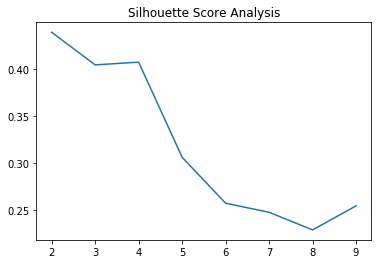

In [305]:
#Silhouette score analysis

ss = []
for k in range(2,10):
    kmeans = KMeans(n_clusters = k).fit(df2)
    ss.append([k, silhouette_score(df2, kmeans.labels_)])

plt.title("Silhouette Score Analysis")    
plt.plot(pd.DataFrame(ss)[0], pd.DataFrame(ss)[1]);

In [223]:
ss

[[2, 0.43936741864062273],
 [3, 0.40454367097634275],
 [4, 0.40536965932472213],
 [5, 0.3022012888296522],
 [6, 0.24864181383042727],
 [7, 0.23814830365976442],
 [8, 0.24994471736861038],
 [9, 0.24645995433716827]]

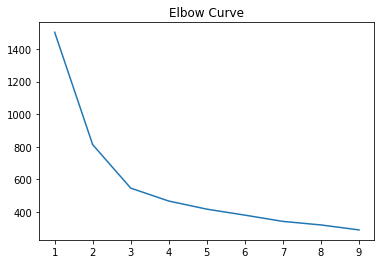

In [306]:
#Now let's proceed to the elbow curve method
ssd = []
for k in list(range(1,10)):
    model = KMeans(n_clusters = k, max_iter = 50).fit(df1)
    ssd.append([k, model.inertia_])
plt.title("Elbow Curve")  
plt.plot(pd.DataFrame(ssd)[0], pd.DataFrame(ssd)[1]);

In [308]:
#Let's perform K means using K=3
kmean = KMeans(n_clusters =3, max_iter = 50, random_state = 50)
kmean.fit(df2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [309]:
## Let's make a copy of our original data before using it for analysis
df_org = country.copy()

In [310]:
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,0.57,248.30,1610.0,9.44,56.2,5.82,553.0
1,Albania,16.6,1145.20,0.43,1987.74,9930.0,4.49,76.3,1.65,4090.0
2,Algeria,27.3,1712.64,0.17,1400.44,12900.0,16.10,76.5,2.89,4460.0
3,Angola,119.0,2199.19,0.08,1514.37,5900.0,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,5551.00,0.36,7185.80,19100.0,1.44,76.8,2.13,12200.0


In [311]:
col = country.columns
col

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [312]:
# Let's add the cluster Ids to the original data 
df_km = pd.concat([country, pd.Series(kmean.labels_)], axis = 1)
df_km.columns = ['country','child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp','cluster_id']
df_km.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,0.57,248.30,1610.0,9.44,56.2,5.82,553.0,2
1,Albania,16.6,1145.20,0.43,1987.74,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,1712.64,0.17,1400.44,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,2199.19,0.08,1514.37,5900.0,22.40,60.1,6.16,3530.0,2
4,Antigua and Barbuda,10.3,5551.00,0.36,7185.80,19100.0,1.44,76.8,2.13,12200.0,1


In [313]:
# Cross-check
df_km.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
cluster_id    0
dtype: int64

In [314]:
# Check the count of observation per cluster
df_km['cluster_id'].value_counts()

1    80
2    45
0    42
Name: cluster_id, dtype: int64

In [315]:
df_km['cluster_id']

0      2
1      1
2      1
3      2
4      1
      ..
162    1
163    1
164    1
165    2
166    2
Name: cluster_id, Length: 167, dtype: int32

In [316]:
country.tail()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
162,Vanuatu,29.2,1384.02,0.28,1565.19,2950.0,2.62,63.0,3.50,2970.0
163,Venezuela,17.1,3847.50,0.24,2376.00,16500.0,45.90,75.4,2.47,13500.0
164,Vietnam,23.3,943.20,0.47,1050.62,4490.0,12.10,73.1,1.95,1310.0
165,Yemen,56.3,393.00,0.27,450.64,4480.0,23.60,67.5,4.67,1310.0
166,Zambia,83.1,540.20,0.35,451.14,3280.0,14.00,52.0,5.40,1460.0


In [317]:
df_km['cluster_id']=df_km['cluster_id'].fillna(0)
df_km['cluster_id']=df_km['cluster_id'].astype(int)
df_km.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,0.57,248.30,1610.0,9.44,56.2,5.82,553.0,2
1,Albania,16.6,1145.20,0.43,1987.74,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,1712.64,0.17,1400.44,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,2199.19,0.08,1514.37,5900.0,22.40,60.1,6.16,3530.0,2
4,Antigua and Barbuda,10.3,5551.00,0.36,7185.80,19100.0,1.44,76.8,2.13,12200.0,1


The features [gdpp, child_mort and income] are being considered to form the clusters as they have been identified as the key indicators of country's socio-economic health.

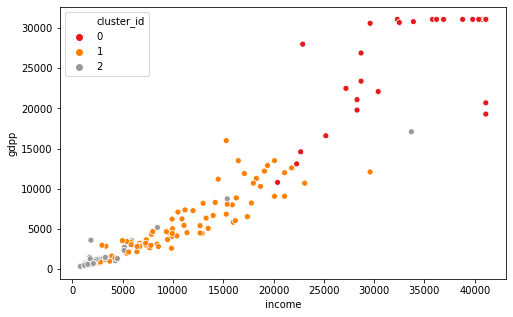

In [366]:
# Plot the Cluster with respect to the clusters obtained
plt.figure(figsize=(8,5))
sns.scatterplot(x = 'income', y = 'gdpp', hue ='cluster_id', legend = 'full', data = df_km, palette='Set1')


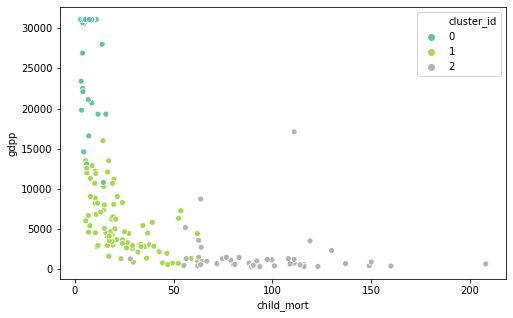

In [367]:
plt.figure(figsize=(8,5))
sns.scatterplot(x = 'child_mort', y = 'gdpp', hue ='cluster_id', legend = 'full', data = df_km, palette='Set2')

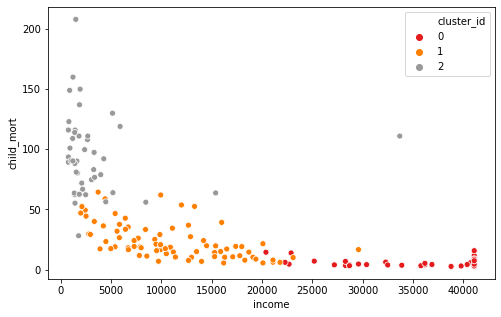

In [368]:
plt.figure(figsize=(8,5))
sns.scatterplot(x = 'income', y = 'child_mort', hue ='cluster_id', legend = 'full', data = df_km, palette='Set1')

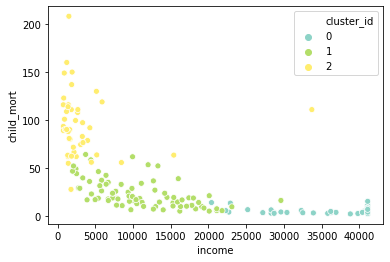

In [334]:
sns.scatterplot(x = 'income', y = 'child_mort', hue ='cluster_id', legend = 'full', data = df_km, palette='Set3')

## Cluster Profiling

In [323]:
df_km.groupby('cluster_id').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster_id,,,,,,,,,
0,5.859524,13668.123810,0.794286,12095.858568,35692.936722,3.057905,79.369048,1.808571,27322.619048
1,23.635000,2266.166125,0.447375,2483.774374,11136.125000,7.890862,72.305000,2.334500,5707.525000
2,94.537778,790.530000,0.466000,731.830443,3317.599998,11.997000,59.220000,5.102000,1636.044444


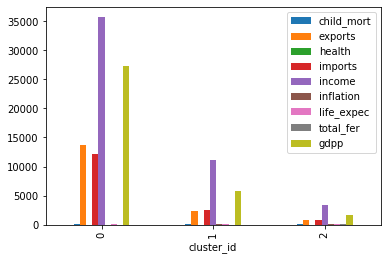

In [324]:
df_km.groupby('cluster_id').mean().plot(kind = 'bar')

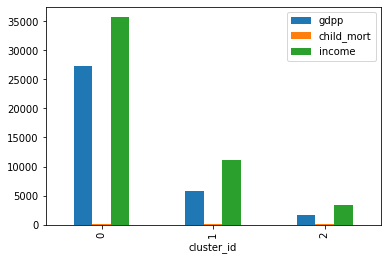

In [325]:
df_km[['gdpp', 'child_mort','income','cluster_id']].groupby('cluster_id').mean().plot(kind = 'bar')

In [326]:
#Finding the countries based on the cluster_id=2 as these represent the most vulnerable population.

df_km[df_km['cluster_id']==2]['country']

0                   Afghanistan
3                        Angola
17                        Benin
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106                  Mozambique
108                     Namibia
112     

In [327]:
df_km[df_km['cluster_id']==2].sort_values(by=['income'], ascending=True) 

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
88,Liberia,89.3,62.460000,1.39,302.800000,763.999948,5.470,60.8,5.02,333.999994,2
37,"Congo, Dem. Rep.",116.0,137.270000,0.63,165.660000,763.999948,20.800,57.5,6.54,334.000000,2
26,Burundi,93.6,23.089998,1.35,112.309948,764.000000,12.300,57.7,6.26,333.999994,2
112,Niger,123.0,77.260000,0.27,170.870000,814.000000,2.550,58.8,7.49,348.000000,2
31,Central African Republic,149.0,52.630000,0.16,118.190000,888.000000,2.010,47.5,5.21,446.000000,2
106,Mozambique,101.0,131.990000,0.27,193.580000,918.000000,7.640,54.5,5.56,419.000000,2
94,Malawi,90.5,104.650000,0.43,160.190000,1030.000000,12.100,53.1,5.31,459.000000,2
63,Guinea,109.0,196.340000,0.24,279.940000,1190.000000,16.100,58.0,5.34,648.000000,2
150,Togo,90.3,196.180000,0.59,279.620000,1210.000000,1.180,58.7,4.87,488.000000,2
132,Sierra Leone,160.0,67.030000,1.72,137.660000,1220.000000,17.200,55.0,5.20,399.000000,2


In [328]:
df_km[df_km['cluster_id']==2].sort_values(by=['gdpp'], ascending=True) 

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
88,Liberia,89.3,62.460000,1.39,302.800000,763.999948,5.470,60.8,5.02,333.999994,2
26,Burundi,93.6,23.089998,1.35,112.309948,764.000000,12.300,57.7,6.26,333.999994,2
37,"Congo, Dem. Rep.",116.0,137.270000,0.63,165.660000,763.999948,20.800,57.5,6.54,334.000000,2
112,Niger,123.0,77.260000,0.27,170.870000,814.000000,2.550,58.8,7.49,348.000000,2
132,Sierra Leone,160.0,67.030000,1.72,137.660000,1220.000000,17.200,55.0,5.20,399.000000,2
93,Madagascar,62.2,103.250000,0.14,177.590000,1390.000000,8.790,60.8,4.60,413.000000,2
106,Mozambique,101.0,131.990000,0.27,193.580000,918.000000,7.640,54.5,5.56,419.000000,2
31,Central African Republic,149.0,52.630000,0.16,118.190000,888.000000,2.010,47.5,5.21,446.000000,2
94,Malawi,90.5,104.650000,0.43,160.190000,1030.000000,12.100,53.1,5.31,459.000000,2
50,Eritrea,55.2,23.090000,0.07,112.310000,1420.000000,11.600,61.7,4.61,482.000000,2


In [329]:
df_km[df_km['cluster_id']==2].sort_values(by=['child_mort'], ascending=True) 

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
136,Solomon Islands,28.1,635.970000,0.73,1047.480000,1780.000000,6.810,61.7,4.24,1290.000000,2
50,Eritrea,55.2,23.090000,0.07,112.310000,1420.000000,11.600,61.7,4.61,482.000000,2
108,Namibia,56.0,2480.820000,0.46,3150.330000,8460.000000,3.560,58.6,3.60,5190.000000,2
165,Yemen,56.3,393.000000,0.27,450.640000,4480.000000,23.600,67.5,4.67,1310.000000,2
93,Madagascar,62.2,103.250000,0.14,177.590000,1390.000000,8.790,60.8,4.60,413.000000,2
80,Kenya,62.2,200.170000,0.23,324.910000,2480.000000,2.090,62.8,4.37,967.000000,2
149,Timor-Leste,62.6,79.200000,0.83,1000.800000,1850.000000,26.500,71.1,6.23,3600.000000,2
81,Kiribati,62.7,198.170000,1.28,1190.510000,1730.000000,1.520,60.7,3.84,1490.000000,2
126,Rwanda,63.6,67.560000,1.10,168.900000,1350.000000,2.610,64.6,4.51,563.000000,2
55,Gabon,63.7,5048.750000,0.12,1653.750000,15400.000000,16.600,62.9,4.08,8750.000000,2


In [330]:
df_final=df_km[df_km['cluster_id']==2].sort_values(by=['gdpp','child_mort',"income"], ascending=[True, True,True]) 
df_final.head(10) 

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
88,Liberia,89.3,62.460000,1.39,302.800000,763.999948,5.47,60.8,5.02,333.999994,2
26,Burundi,93.6,23.089998,1.35,112.309948,764.000000,12.30,57.7,6.26,333.999994,2
37,"Congo, Dem. Rep.",116.0,137.270000,0.63,165.660000,763.999948,20.80,57.5,6.54,334.000000,2
112,Niger,123.0,77.260000,0.27,170.870000,814.000000,2.55,58.8,7.49,348.000000,2
132,Sierra Leone,160.0,67.030000,1.72,137.660000,1220.000000,17.20,55.0,5.20,399.000000,2
93,Madagascar,62.2,103.250000,0.14,177.590000,1390.000000,8.79,60.8,4.60,413.000000,2
106,Mozambique,101.0,131.990000,0.27,193.580000,918.000000,7.64,54.5,5.56,419.000000,2
31,Central African Republic,149.0,52.630000,0.16,118.190000,888.000000,2.01,47.5,5.21,446.000000,2
94,Malawi,90.5,104.650000,0.43,160.190000,1030.000000,12.10,53.1,5.31,459.000000,2
50,Eritrea,55.2,23.090000,0.07,112.310000,1420.000000,11.60,61.7,4.61,482.000000,2


### Hierarchichal Clustering

In [292]:
# Import some important libraries to perform Heirarchichal cluatering

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [293]:
df2.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.797327,0.069016,-0.846454,-0.995359,0.157336,-1.619092,1.902882,-0.864350
1,-0.538949,-0.611673,-0.249248,-0.494283,-0.386223,-0.312347,0.647866,-0.859973,-0.542320
2,-0.272833,-0.515016,-0.840311,-0.613189,-0.168779,0.789274,0.670423,-0.038404,-0.508633
3,2.007808,-0.432137,-1.044910,-0.590123,-0.681273,1.387054,-1.179234,2.128151,-0.593306
4,-0.695634,0.138810,-0.408381,0.558126,0.285144,-0.601749,0.704258,-0.541946,0.196063


In [294]:
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,0.57,248.30,1610.0,9.44,56.2,5.82,553.0
1,Albania,16.6,1145.20,0.43,1987.74,9930.0,4.49,76.3,1.65,4090.0
2,Algeria,27.3,1712.64,0.17,1400.44,12900.0,16.10,76.5,2.89,4460.0
3,Angola,119.0,2199.19,0.08,1514.37,5900.0,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,5551.00,0.36,7185.80,19100.0,1.44,76.8,2.13,12200.0


In [295]:
df_km.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,0.57,248.30,1610.0,9.44,56.2,5.82,553.0,2
1,Albania,16.6,1145.20,0.43,1987.74,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,1712.64,0.17,1400.44,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,2199.19,0.08,1514.37,5900.0,22.40,60.1,6.16,3530.0,2
4,Antigua and Barbuda,10.3,5551.00,0.36,7185.80,19100.0,1.44,76.8,2.13,12200.0,1


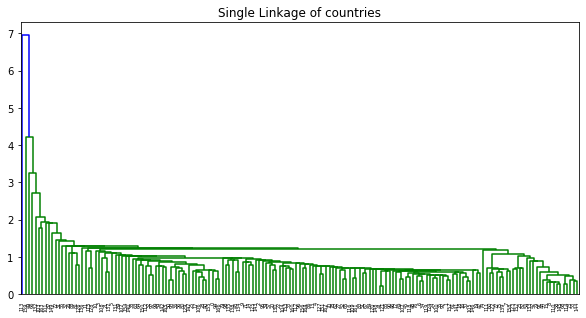

In [355]:
# Single linkage to compute the minumum distance between two data points to form clusters
plt.figure(figsize=(10,5))
merge_single=linkage(df2,method='single',metric='euclidean')
dendrogram(merge_single)
plt.title("Single Linkage of countries")
plt.show()

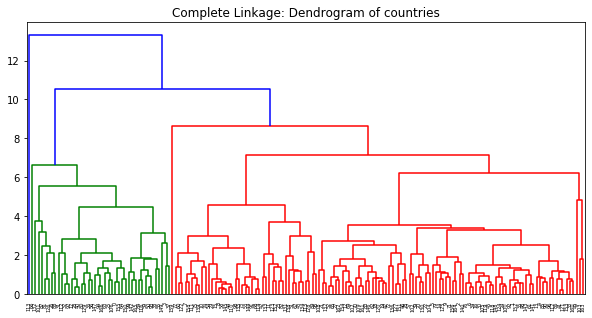

In [354]:
#Complete Linkage
plt.figure(figsize=(10,5))
merge_complete=linkage(df2,method='complete',metric='euclidean')
dendrogram(merge_complete)
plt.title("Complete Linkage: Dendrogram of countries")
plt.show()

The dendrogram above suggests that there could be three possible clusters if a cut is made across it.

In [298]:
# 3 clusters

cluster_labels=cut_tree(merge_complete,n_clusters=3).reshape(-1,)
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0])

In [299]:
df_km['cluster_labels']=cluster_labels
df_km.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
0,Afghanistan,90.2,55.30,0.57,248.30,1610.0,9.44,56.2,5.82,553.0,2,0
1,Albania,16.6,1145.20,0.43,1987.74,9930.0,4.49,76.3,1.65,4090.0,1,1
2,Algeria,27.3,1712.64,0.17,1400.44,12900.0,16.10,76.5,2.89,4460.0,1,1
3,Angola,119.0,2199.19,0.08,1514.37,5900.0,22.40,60.1,6.16,3530.0,2,0
4,Antigua and Barbuda,10.3,5551.00,0.36,7185.80,19100.0,1.44,76.8,2.13,12200.0,1,1


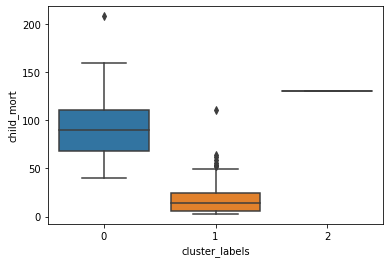

In [300]:
# box-plot

sns.boxplot(x='cluster_labels',y='child_mort',data=df_km)

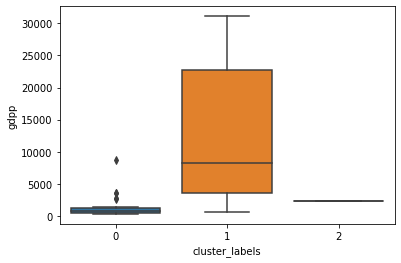

In [301]:
sns.boxplot(x='cluster_labels',y='gdpp',data=df_km)

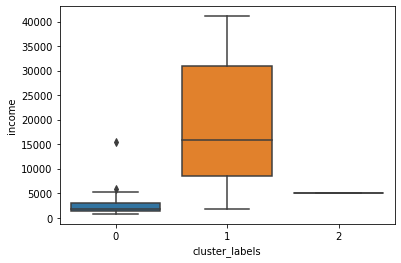

In [302]:
sns.boxplot(x='cluster_labels',y='income',data=df_km)

In [303]:
df_hier=df_km[df_km['cluster_labels']==0].sort_values(by=['gdpp','child_mort',"income"], ascending=[True, True,True]) 
df_hier.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
88,Liberia,89.3,62.460000,1.39,302.800000,763.999948,5.47,60.8,5.02,333.999994,2,0
26,Burundi,93.6,23.089998,1.35,112.309948,764.000000,12.30,57.7,6.26,333.999994,2,0
37,"Congo, Dem. Rep.",116.0,137.270000,0.63,165.660000,763.999948,20.80,57.5,6.54,334.000000,2,0
112,Niger,123.0,77.260000,0.27,170.870000,814.000000,2.55,58.8,7.49,348.000000,2,0
132,Sierra Leone,160.0,67.030000,1.72,137.660000,1220.000000,17.20,55.0,5.20,399.000000,2,0
93,Madagascar,62.2,103.250000,0.14,177.590000,1390.000000,8.79,60.8,4.60,413.000000,2,0
106,Mozambique,101.0,131.990000,0.27,193.580000,918.000000,7.64,54.5,5.56,419.000000,2,0
31,Central African Republic,149.0,52.630000,0.16,118.190000,888.000000,2.01,47.5,5.21,446.000000,2,0
94,Malawi,90.5,104.650000,0.43,160.190000,1030.000000,12.10,53.1,5.31,459.000000,2,0
50,Eritrea,55.2,23.090000,0.07,112.310000,1420.000000,11.60,61.7,4.61,482.000000,2,0


It is found that the weak 10 countries derived from both types of clustering are the same.

# 5.Suggestions and Recommendations

Both clustering techniques have presented with the same set of countries which may need aid from HELP Internarional. The countries which need aid are as follows:

1. Liberia
2. Burundi
3. Congo, Dem. Rep.
4. Niger
5. Sierra Leone	


In [342]:
# Let's analyse these countries further
poverty=df_hier.head(5)
poverty

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
88,Liberia,89.3,62.460000,1.39,302.800000,763.999948,5.47,60.8,5.02,333.999994,2,0
26,Burundi,93.6,23.089998,1.35,112.309948,764.000000,12.30,57.7,6.26,333.999994,2,0
37,"Congo, Dem. Rep.",116.0,137.270000,0.63,165.660000,763.999948,20.80,57.5,6.54,334.000000,2,0
112,Niger,123.0,77.260000,0.27,170.870000,814.000000,2.55,58.8,7.49,348.000000,2,0
132,Sierra Leone,160.0,67.030000,1.72,137.660000,1220.000000,17.20,55.0,5.20,399.000000,2,0


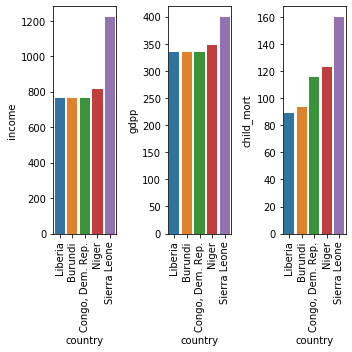

In [345]:
fig= plt.figure(figsize=(5, 5))

plt.subplot(1,3,1)
sns.barplot(x='country', y='income', data=poverty)
plt.xticks(rotation = 90)

plt.subplot(1,3,2)
sns.barplot(x='country', y='gdpp', data=poverty)
plt.xticks(rotation = 90)

plt.subplot(1,3,3)
sns.barplot(x='country', y='child_mort', data=poverty)
plt.xticks(rotation = 90)

fig.tight_layout()
plt.show()

Of the countries chosen, Sierra Leone seems to do better than the other four in terms of income and gdpp. However, it is a pressing issue to see the child_mortality pretty high. However, the incomes and gdpp remain almost the same across them. 

H.E.L.P is advised to prepare teams of volunteers from these countries to create awareness about the impact of high child mortality. The income per household when compared to the rest of the world as per the data is also a pressing issue. 

Running a survey among the people to understand their challenges is encouraged. 

-Poverty alleviation is possible through quality education.

-Initiate Online/Offline courses for free to upskill the population

-Encourage people to work to increase economic activity and create wealth for themselves. 

-Initiate setting up small industries in which every member of households could participate.


### THANK YOU 